In [96]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# Replace 'filename.csv' with the path to your CSV file
df_smote = pd.read_csv('files/df_smote.csv')
coefficients_outside_95 = pd.read_csv('files/coefficients_outside_95.csv')

In [98]:
df_smote.head(5)

,s10,s1,s4,s11,s22,s6,s19,s18,s3,s15,...,a36,a39,a41,a43,a44,a28,a40,a49,fo_probability,fo_computerisation
0,47,72,69,47,13,50,25,28,69,38,...,22,3,0,0,0,25,3,0,0.370,0
1,78,81,72,78,16,66,44,50,81,56,...,0,28,16,0,31,22,6,0,0.400,0
2,56,69,47,53,53,53,50,41,66,38,...,19,50,53,0,50,50,25,19,0.240,0
3,81,81,50,63,25,53,72,50,75,44,...,0,78,0,0,91,13,13,0,0.035,0
4,69,69,75,69,16,56,53,53,78,53,...,0,47,3,0,50,16,19,0,0.015,0


In [99]:
coefficients_outside_95.head(4)

,id,coefficient,skill,skill_description
0,a12,-0.1107,Deductive Reasoning,The ability to apply general rules to specific...
1,a27,-0.1043,Extent Flexibility,"The ability to bend, stretch, twist, or reach ..."
2,s6,-0.0943,Monitoring,"Monitoring/Assessing performance of yourself, ..."
3,a5,-0.0807,Written Comprehension,The ability to read and understand information...


In [100]:
# Get the column names that are not in coefficients_outside_95["id"] and start with 's' or 'a'
cols_to_zero = [col for col in df_smote.columns if (col not in coefficients_outside_95["id"].values) and (col.startswith('s') or col.startswith('a'))]

# add ids that were removed manually
cols_to_zero.extend(["a27","s6","a5","a30","a31","a29","s30","a28","s20","a34","s1"])

In [101]:
# Drop these columns
df_smote = df_smote.drop(columns=cols_to_zero)

# Display the first few rows of the DataFrame
df_smote.head(5)

,s24,s21,s8,a12,fo_probability,fo_computerisation
0,6,19,47,47,0.370,0
1,19,22,72,78,0.400,0
2,28,44,63,72,0.240,0
3,22,50,75,75,0.035,0
4,19,44,63,72,0.015,0


In [102]:
# Extract coefficients outside the 95% confidence interval
selected_coefficients = coefficients_outside_95[["id","coefficient"]]

In [103]:
#
coef_dict = selected_coefficients.set_index('id')['coefficient'].to_dict()

for col in df_smote.columns:
    if col.startswith(('a', 's')):
        df_smote[f'weight_{col}'] = coef_dict.get(col, 1)
        
print("Keys in coef_dict:", coef_dict.keys())

relevant_cols = [col for col in df_smote.columns if col.startswith(('a', 's'))]
print("Relevant columns in df_calculate_automation:", relevant_cols)

df_smote.head(5)

Keys in coef_dict: dict_keys(['a12', 'a27', 's6', 'a5', 'a30', 'a31', 's21', 'a29', 's24', 's30', 'a28', 's20', 'a34', 's1', 's8'])
Relevant columns in df_calculate_automation: ['s24', 's21', 's8', 'a12']


,s24,s21,s8,a12,fo_probability,fo_computerisation,weight_s24,weight_s21,weight_s8,weight_a12
0,6,19,47,47,0.370,0,0.0564,-0.052,0.1067,-0.1107
1,19,22,72,78,0.400,0,0.0564,-0.052,0.1067,-0.1107
2,28,44,63,72,0.240,0,0.0564,-0.052,0.1067,-0.1107
3,22,50,75,75,0.035,0,0.0564,-0.052,0.1067,-0.1107
4,19,44,63,72,0.015,0,0.0564,-0.052,0.1067,-0.1107


In [104]:
weighted_cols = [col for col in df_smote.columns if col.startswith(('a', 's'))]

df_smote['weighted_sum'] = 0

for col in weighted_cols:
    df_smote['weighted_sum'] += df_smote[col] * df_smote[f'weight_{col}']
    
df_smote.head(5)

,s24,s21,s8,a12,fo_probability,fo_computerisation,weight_s24,weight_s21,weight_s8,weight_a12,weighted_sum
0,6,19,47,47,0.370,0,0.0564,-0.052,0.1067,-0.1107,-0.8376
1,19,22,72,78,0.400,0,0.0564,-0.052,0.1067,-0.1107,-1.0246
2,28,44,63,72,0.240,0,0.0564,-0.052,0.1067,-0.1107,-1.9571
3,22,50,75,75,0.035,0,0.0564,-0.052,0.1067,-0.1107,-1.6592
4,19,44,63,72,0.015,0,0.0564,-0.052,0.1067,-0.1107,-2.4647


In [105]:
df_smote['automation_probability'] = df_smote['weighted_sum'].apply(lambda x: 1 / (1 + np.exp(-x)))

In [106]:
df_smote.nlargest(5, 'automation_probability')

,s24,s21,s8,a12,fo_probability,fo_computerisation,weight_s24,weight_s21,weight_s8,weight_a12,weighted_sum,automation_probability
222,22,0,50,50,0.940,1,0.0564,-0.052,0.1067,-0.1107,1.0408,0.739004
201,22,0,50,53,0.710,1,0.0564,-0.052,0.1067,-0.1107,0.7087,0.670114
218,16,3,50,50,0.870,1,0.0564,-0.052,0.1067,-0.1107,0.5464,0.633300
45,13,0,50,50,0.770,1,0.0564,-0.052,0.1067,-0.1107,0.5332,0.630229
103,25,28,60,53,0.003,0,0.0564,-0.052,0.1067,-0.1107,0.4889,0.619847


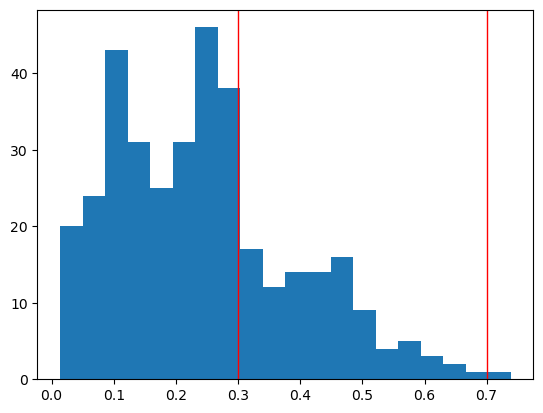

In [107]:
# Get the values
x = df_smote["automation_probability"].values

# Calculate the histogram
hist, bins = np.histogram(x, bins=20)

# Calculate the width and center of the bars
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

# Plot the histogram
plt.bar(center, hist, align='center', width=width)

# Add lines at 0.3 and 0.7
plt.axvline(0.3, color='r', linewidth=1)
plt.axvline(0.7, color='r', linewidth=1)

# Show the plot
plt.show()

In [108]:
# Count the number of jobs with automation probability below 0.3
jobs_below_03 = (df_smote["automation_probability"] < 0.3).sum()
print(f"Number of jobs with automation probability pi | pi <= 0.3: {jobs_below_03}")

# Count the number of jobs with automation probability between 0.3 and 0.7
jobs_between_03_and_07 = ((df_smote["automation_probability"] >= 0.31) & (df_smote["automation_probability"] <= 0.7)).sum()
print(f"Number of jobs with automation probability | pi 0.3 < pi <= 0.7 : {jobs_between_03_and_07}")

# Count the number of jobs with automation probability > 0.7
jobs_above_07 = (df_smote["automation_probability"] > 0.7).sum()
print(f"Number of jobs with automation probability | pi pi > 0.7: {jobs_above_07}")

Number of jobs with automation probability pi | pi <= 0.3: 254
Number of jobs with automation probability | pi 0.3 < pi <= 0.7 : 97
Number of jobs with automation probability | pi pi > 0.7: 1
